In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)


2.2.0
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.3.4
numpy 1.19.5
pandas 1.1.5
sklearn 0.24.2
tensorflow 2.2.0
tensorflow.keras 2.3.0-tf


In [11]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [12]:
# x = (x - u) / std

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# x_train: [None, 28, 28] -> [None, 784]
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)


In [13]:
# tf.keras.models.Sequential()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
#这次我们做20层
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="relu"))
#结果层
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(0.001),
              metrics = ["accuracy"])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_22 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_23 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_24 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_25 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_26 (Dense)             (None, 100)              

In [15]:
model.layers

In [16]:
# Tensorboard, earlystopping, ModelCheckpoint
logdir = './dnn-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,
                                 "fashion_mnist_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,
                                    save_best_only = True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3),
]
history = model.fit(x_train_scaled, y_train, epochs=100,
                    validation_data=(x_valid_scaled, y_valid),
                    callbacks = callbacks)

Epoch 1/100
1719/1719 [==============================] - 10s 6ms/step - loss: 2.3017 - accuracy: 0.1553 - val_loss: 2.3008 - val_accuracy: 0.2216
Epoch 2/100
1719/1719 [==============================] - 10s 6ms/step - loss: 2.2998 - accuracy: 0.1969 - val_loss: 2.2983 - val_accuracy: 0.1716
Epoch 3/100
1719/1719 [==============================] - 10s 6ms/step - loss: 2.2963 - accuracy: 0.1786 - val_loss: 2.2934 - val_accuracy: 0.1768
Epoch 4/100
1719/1719 [==============================] - 10s 6ms/step - loss: 2.2894 - accuracy: 0.1790 - val_loss: 2.2836 - val_accuracy: 0.1782
Epoch 5/100
1719/1719 [==============================] - 10s 6ms/step - loss: 2.2741 - accuracy: 0.2213 - val_loss: 2.2596 - val_accuracy: 0.2132
Epoch 6/100
1719/1719 [==============================] - 10s 6ms/step - loss: 2.2342 - accuracy: 0.2059 - val_loss: 2.1957 - val_accuracy: 0.2174
Epoch 7/100
1719/1719 [==============================] - 10s 6ms/step - loss: 2.1155 - accuracy: 0.2040 - val_loss: 1.9846 -

In [17]:
history.history

{'loss': [2.301673173904419,
  2.2997548580169678,
  2.296314001083374,
  2.289360761642456,
  2.274127960205078,
  2.234225034713745,
  2.1154565811157227,
  1.7181506156921387,
  1.1354320049285889,
  0.9760223627090454,
  0.894171953201294,
  0.8362822532653809,
  0.7931923866271973,
  0.7531559467315674,
  0.7107523679733276,
  0.672046959400177,
  0.6323476433753967,
  0.6035771369934082,
  0.5841276049613953,
  0.5560098886489868,
  0.539946973323822,
  0.5222569704055786,
  0.5075091123580933,
  0.49167630076408386,
  0.4791579246520996,
  0.4648057222366333,
  0.4523782730102539,
  0.4368637502193451,
  0.42607828974723816,
  0.41715237498283386,
  0.4075227379798889,
  0.397213876247406,
  0.3873938322067261,
  0.37972208857536316,
  0.37113818526268005],
 'accuracy': [0.1552909016609192,
  0.19687272608280182,
  0.1785818189382553,
  0.17898181080818176,
  0.2213272750377655,
  0.2059272676706314,
  0.20398181676864624,
  0.27318182587623596,
  0.5100363492965698,
  0.5805272

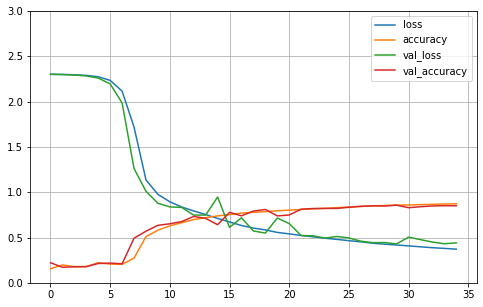

In [18]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 3)
    plt.show()

plot_learning_curves(history)

#如果初期变化效果不明显
# 1. 参数众多，训练不充分
# 2. 梯度消失 -> 链式法则 -> 复合函数f(g(x))求导，前期参数太多

In [19]:
model.evaluate(x_test_scaled, y_test, verbose=0)

[0.4719459116458893, 0.8374000191688538]